In [4]:
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
from scripts.mapcalc_kde import plot_KDE

In [14]:
%matplotlib inline

In [2]:
# Boundary conditions for all maps (longitudes as x vals, latitudes as y vals)
lonmin = -76.72
lonmax = -76.52
latmin = 39.19
latmax = 39.38

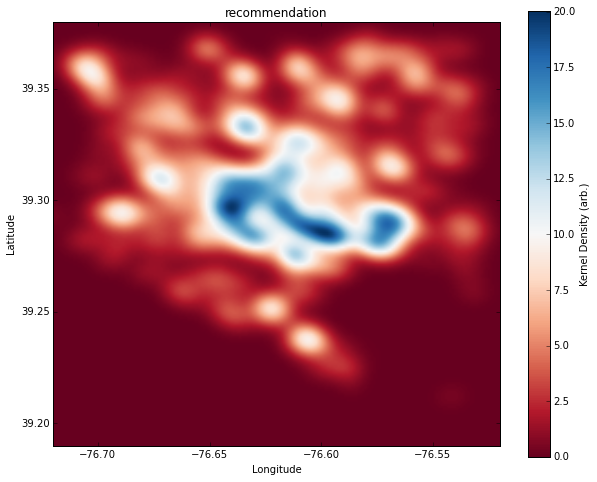

In [29]:
# multipliers corresponding to user preferences
# to be set by radio buttons in the webapp
crime_mult      = 0
vacancy_mult    = 1
grocery_mult    = 1
restaurant_mult = 1
schools_mult    = 0
museums_mult    = 1
parks_mult      = 0
liquor_mult     = 1
libraries_mult  = 0

# make an array of the mults
mults = np.array([
        crime_mult, 
        vacancy_mult, 
        grocery_mult, 
        restaurant_mult, 
        schools_mult, 
        museums_mult,
        parks_mult,
        liquor_mult,
        libraries_mult
    ])

# load the dilled dataframe
map_df = dill.load(open('dills/map_df_dynamicBW.dill'))

# number of points along each map edge
# (total number of points is npts**2)
npts = np.sqrt(len(map_df))

# generate appropriate lon/lat grid
x = np.linspace(lonmin, lonmax, npts)
y = np.linspace(latmin, latmax, npts)

# compute recommendation map by multiplying dataframe
# with multiplier array and summing accross rows
mult_map_df = map_df*mults
rec_map = mult_map_df.sum(axis=1).values

# build a better way to filter top locations!!
# plot the map
plot_KDE(x, y, rec_map, 'recommendation')